<center>F M Ayub Khan</center>
<center> Mentor at Ensemblization ML </center>

# Fundamentals of Time Series Analysis
#### Here, the following topics in time series analysis will be discussed
* Time Series
* Import Time Series in Python
* Panel data
* Visualizing a Time Series
* Patterns in a Time Series
* Additive and multiplicative Time Series
* Decomposing a Time Series into its components
* Stationary and non-stationary Time Series
* How to make a Time Series stationary?
* How to test for stationarity?
* Difference between white noise and a stationary series
* How to detrend a Time Series?
* How to deseasonalize a Time Series?
* How to test for seasonality of a Time Series?
* How to treat missing values in a Time Series?
* Autocorrelation and partial autocorrelation functions
* Lag Plots
* Forecastability of a Time Series
* Why and How to smoothen a Time Series?


### 1.  Time series
A time series is a sequence of data points that occur in successive order over some period of time. 
And time series analysis is a specific way of analysing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.<br> In time series,time is a crucial variable because it shows how the data adjusts over the course of the data points as well as the final results

### 2. Importing time series
Time series dataset contains two columns: the date and the measured value.Adding the <b>parse_dates=['date']</b> argument will make the date column to be parsed as a date field.


In [20]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [24]:
df=pd.read_csv("D:/Thesis/Others/TS.csv",parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Alternately, you can import it as a pandas Series with the date as index. You just need to specify the <b>index_col</b> argument in the <b>pd.read_csv()</b> to do this.

In [26]:
df1=pd.read_csv("D:/Thesis/Others/TS.csv",parse_dates=['date'], index_col='date')
df1.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


# 3. Panel Data
Panel data is also a time based dataset.The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods. <br>Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.</br> An example of panel data is given as follows

In [27]:
Panel_data=pd.read_csv('D:/Thesis/Others/MarketArrivals.csv')
Panel_data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df=df.loc[df.market=='MUMBAI',:]

In [4]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# 4. Visualizing  a Time Series


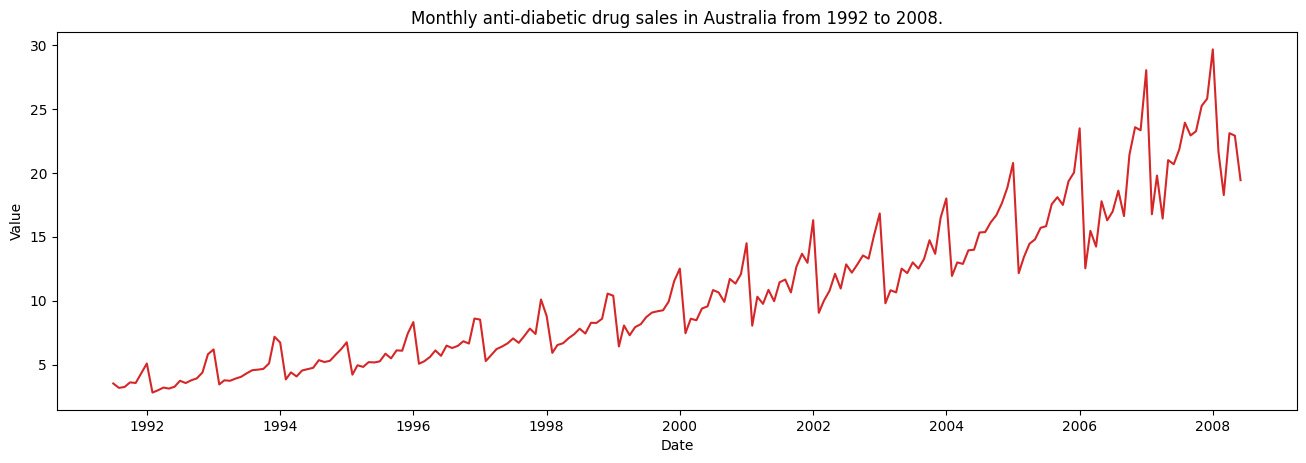

In [35]:
import matplotlib.pyplot as plt
def plot_df(df1,x,y,title="",xlabel="Date",ylabel="Value",dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(sr, x=df1.index, y=df1.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 
    

Alternatively you can use this method. But you have to use <b>df1</b> instead of <b>df</b> as in case of df , the index is not set to the date.

<AxesSubplot:title={'center':'Monthly anti-diabetic drug sales in Australia from 1992 to 2008'}, xlabel='DATE', ylabel='Value'>

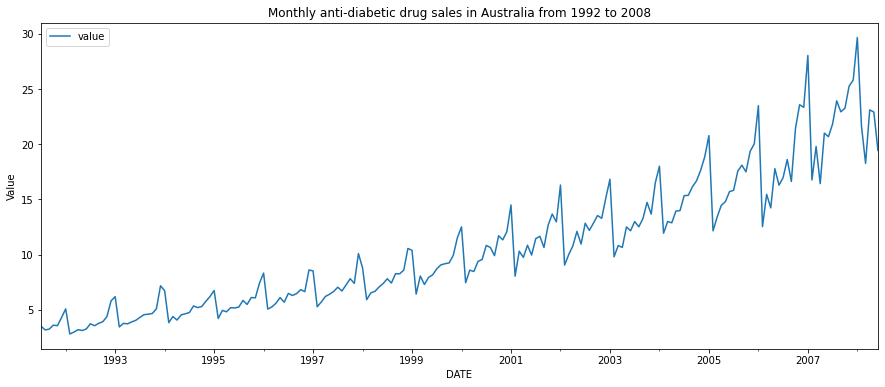

In [32]:

df1.plot(title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008',xlabel="DATE",ylabel="Value",figsize=(15,6))


If you want to plot for indvidual years and see pattern in a given year, you can use the following command. 

<AxesSubplot:xlabel='date'>

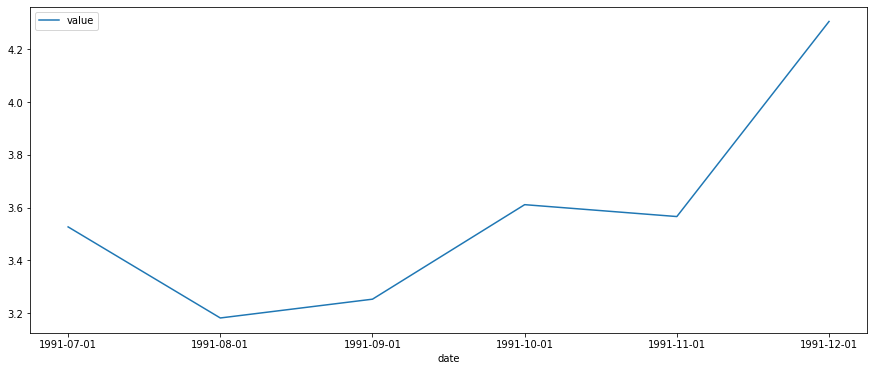

In [7]:
df1['1991':'1992'].plot(figsize=(15,6))


Since its a monthly time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

### Seasonal Plot of a Time Series

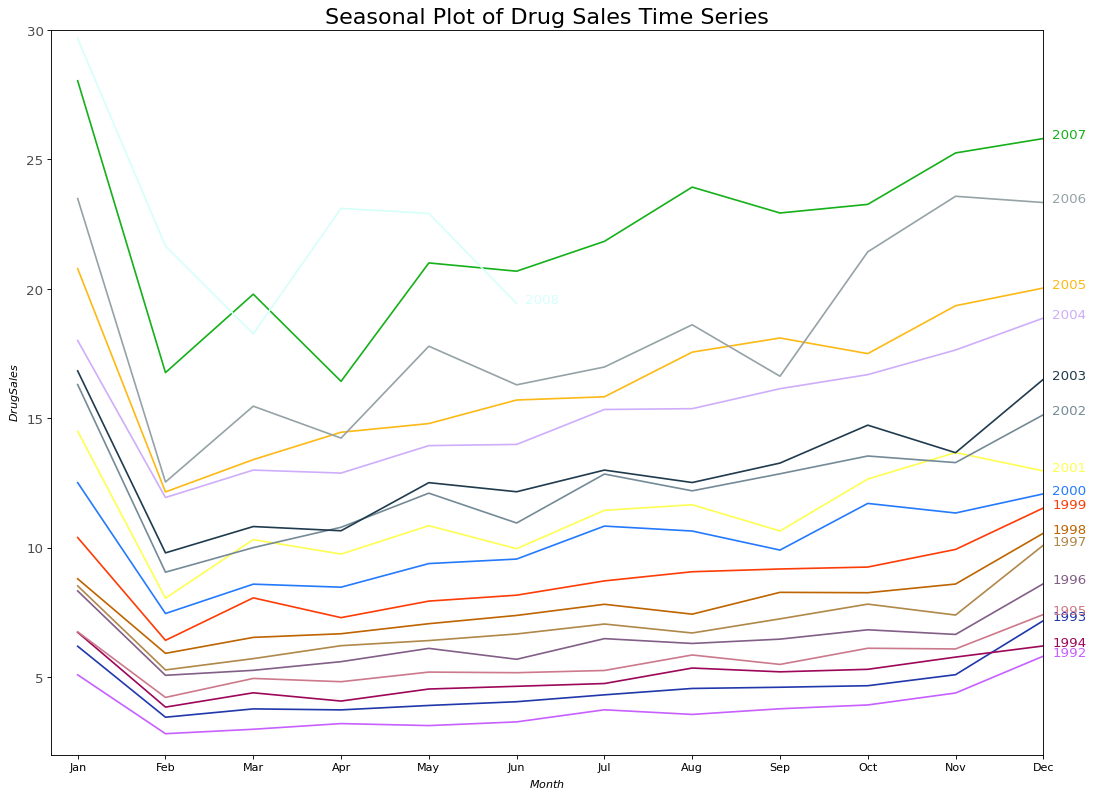

In [12]:
df1['year'] = [d.year for d in df1.date]
df1['month'] = [d.strftime('%b') for d in df1.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df1.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df1.loc[df.year==y, :].shape[0]-.9, df.loc[df1.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

You can visualize nicely the trend which is shown above in year wise boxplot as follows

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
We can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

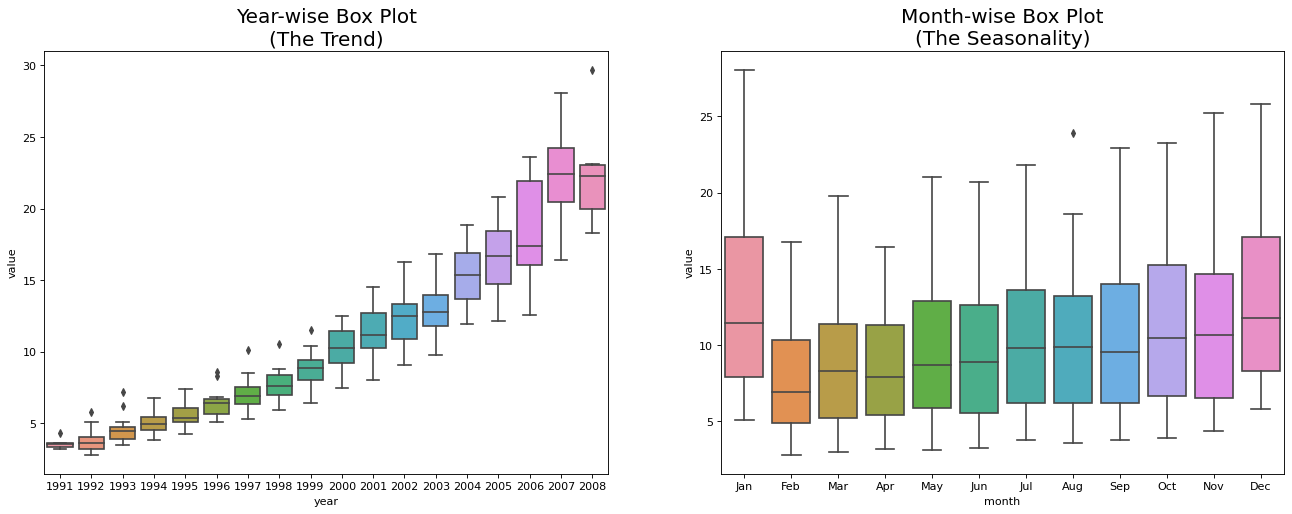

In [14]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

From the both visulization, we can see that there is steep decline in the month of febuary in all years 
So far, we have seen the similarities to identify the pattern.

# 6.Patterns in a time series
So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.
<b>So, a time series may be imagined as a combination of the trend, seasonality and the error terms.</b>

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

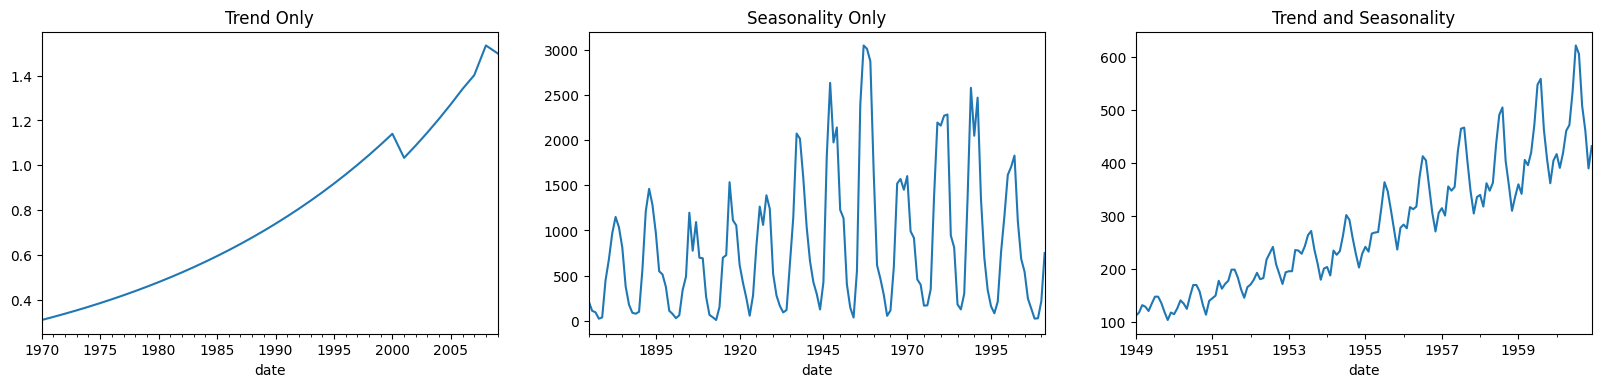

In [36]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

### Difference between "cyclic" and "seasonality"
<b>Cyclic</b> behaviour happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# 6. Additive and multiplicative time series
Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

<b>Additive time series:</b> Value = Base Level + Trend + Seasonality + Error

<b>Multiplicative Time Series:</b> Value = Base Level x Trend x Seasonality x Error

# 7. Identification of Time Series
 In <b> Additive </b>, Y= T+S+R where Y= time series data, T=trend-cycle component, S=Seasonal component, R=Residual. Rearranging, we get <b>R=Y-T- S</b>
 
 In <b> Multiplicative </b>, Y= T*S*R. Rearraging we get, <b>R=Y/(T*R)</b>
 
We can usually identify an additive or multiplicative time series from its variation. If the magnitude of the seasonal component changes with time, then the series is multiplicative. Otherwise, the series is additive.

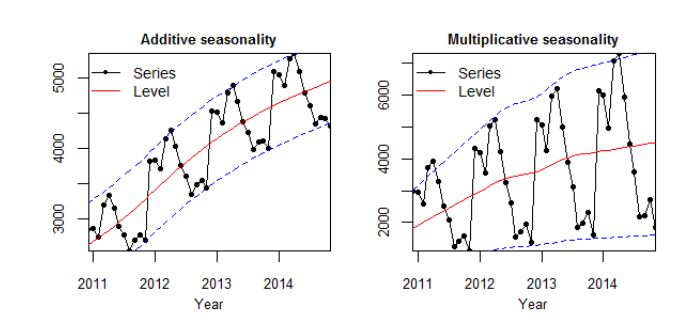

# 8. Decomposing  a time series
Time series decomposition refers to the method by which we reduce our time series data into its following four components:
<ol>
<li>Trend [T]</li>
<li>Cycle [C]</li>
<li>Seasonality [S]</li>
    <li> Residual [R]</li>
</ol>
<b>1) Trend</b>
The trend of a time series refers to the general direction in which the time series is moving. Time series can have a positive or a negative trend, but can also have no trend.

<b> 2) Cycle </b>
The cycle for time series data refers to its tendency to rise and fall at inconsistent frequencies. We often use the cycle component of a time series to discuss business cycles in economic data.

<b> 3) Seasonality</b>
The seasonal component of a time series is similar to its cycle component except for one important difference: the seasonal component refers to data that rises and falls at consistent frequencies.

<b> 4) Residual</b>
It is what’s left of the time series data after removing its trend, cycle, and seasonal components. It is the random fluctuation in the time series data that the above components cannot explain.


The following code shows how multiplicative and additive decomposition can be carried out.


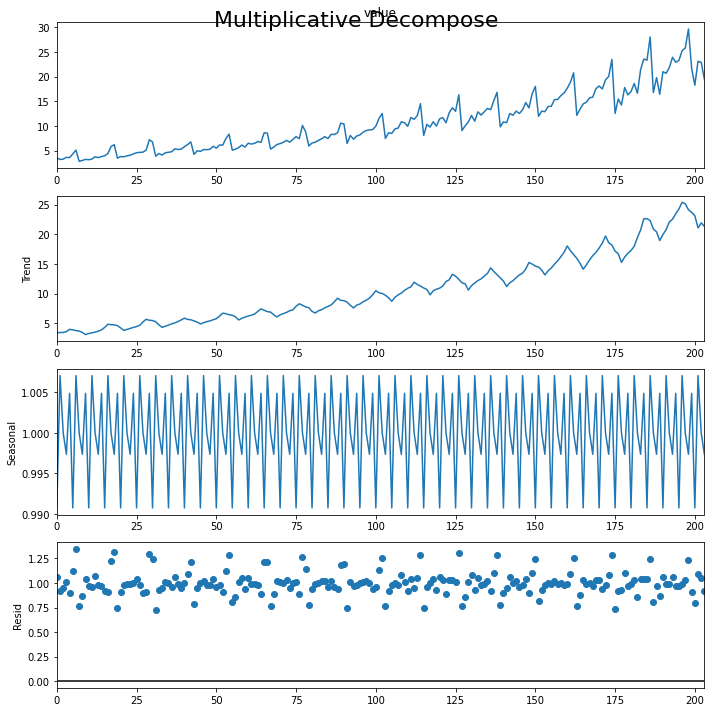

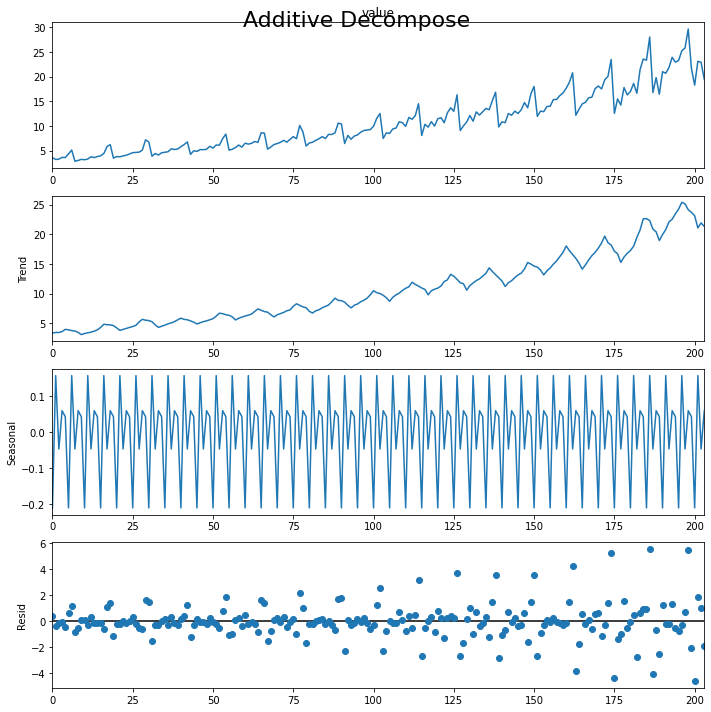

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
result_mul = seasonal_decompose(df1['value'], model='multiplicative', extrapolate_trend='freq', period=5)

# Additive Decomposition
result_add = seasonal_decompose(df1['value'], model='additive',  extrapolate_trend='freq', period=5)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

 In multiplicative decomposition, the product of seas, trend and resid columns should exactly equal to the actual_values. Let's check this as shown below:

In [16]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
0,0.990723,3.343477,1.064644,3.526591
1,1.007069,3.437845,0.918762,3.180891
2,0.999979,3.427315,0.948932,3.252221
3,0.997349,3.583271,1.010418,3.611003
4,1.004880,3.964760,0.895023,3.565869


In [17]:
df1.head()

,index,date,value,year,month
0,0,1991-07-01,3.526591,1991,Jul
1,1,1991-08-01,3.180891,1991,Aug
2,2,1991-09-01,3.252221,1991,Sep
3,3,1991-10-01,3.611003,1991,Oct
4,4,1991-11-01,3.565869,1991,Nov


In [18]:
df_reconstructed['val']=df_reconstructed['seas']*df_reconstructed['trend']*df_reconstructed['resid']

In [19]:
df_reconstructed.head()

,seas,trend,resid,actual_values,val
0,0.990723,3.343477,1.064644,3.526591,3.526591
1,1.007069,3.437845,0.918762,3.180891,3.180891
2,0.999979,3.427315,0.948932,3.252221,3.252221
3,0.997349,3.583271,1.010418,3.611003,3.611003
4,1.004880,3.964760,0.895023,3.565869,3.565869


# 9. Stationary and Non-Stationary Time Series
<b> Stationary Time Series </b> is a time series that has statistical properties or moments (e.g., mean,variance,autocorrelation,etc) that do not vary in time. <b>Stationarity</b>, then, is the status of a stationary time series. <b>Autocorrelation</b> of the series is nothing but the correlation of the series with its previous values, more on this coming up. A stationary time series id devoid of seasonal effects as well.

Conversely, <b>nonstationarity</b> is the status of a time series whose statistical properties are changing through time. The following plots show the difference between stationary and non stationary time series

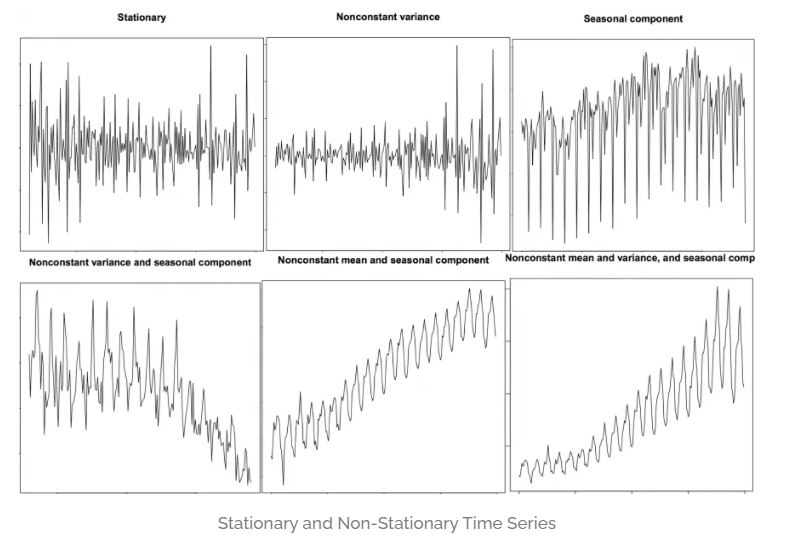


# 9. How to make a time series stationary?
Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

We can make series stationary by:
<ol>
    <li>Differencing the Series (once or more)</li>
    <li>Take the log of the series</li>
    <li>Take the nth root of the series</li>
    <li>Combination of the above</li>
</ol>

The most common and convenient method to stationarize the series is by <b>differencing</b> the series at least once until it becomes approximately stationary.

<b>Differencing:</b> 
If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.


# 10. Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable.
### Reason for stationarization
An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

# 11. How to check stationarity of a time series
* <b>Look at Plots:</b> We can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
* <b>Summary Statistics:</b> We can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
* <b>Statistical Tests:</b> We can use statistical tests to check if the expectations of stationarity are met or have been violated.

There are numbers of <b>statistical tests</b>. Here we will be discussing only <a id = "https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test">Augmented Dickey-Fuller test (ADF)</a>
The ADF test is a type of statistical test called a <a id="https://en.wikipedia.org/wiki/Unit_root_test">unit root test</a>.

### ADF
 It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
    
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


* <b>Null Hypothesis (H0)</b>: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* <b>Alternate Hypothesis (H1)</b>: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the <b>p-value</b> from the test.  A <a id="https://en.wikipedia.org/wiki/P-value">p-value</a> below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


* <b>p-value > 0.05</b>: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* <b>p-value <= 0.05</b>: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


Lets check ADF test to our data

In [37]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df1.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067456
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


# 12. What is the difference between white noise and a stationary series?

Mathematically, a sequence of completely random numbers with mean zero is a white noise. There is no pattern in white noise.

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

For example, If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

<AxesSubplot:title={'center':'Random White Noise'}>

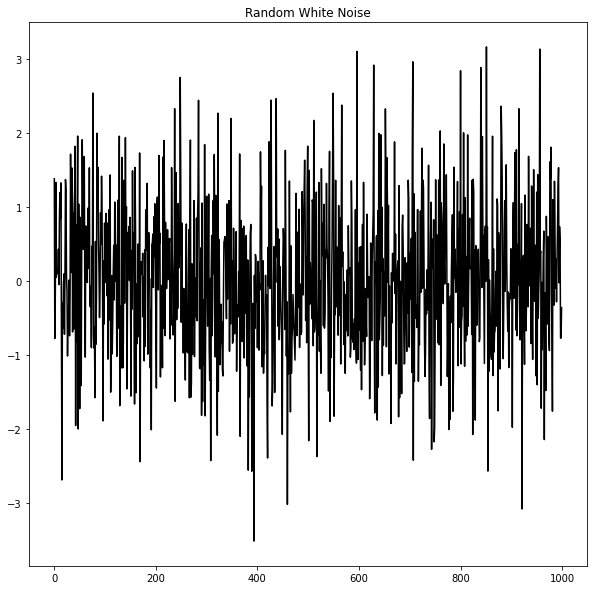

In [38]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

# 13. How to detrend a time series?
<b>Detrending</b> a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

* Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
* Subtract the trend component obtained from time series decomposition we saw earlier.
*Subtract the mean
* Apply a filter like Baxter-King filter( <b> statsmodels.tsa.filters.hpfilter </b>) or the Hodrick-Prescott Filter <b>(statsmodels.tsa.filters.hpfilter)</b> to remove the moving average trend lines or the cyclical components.

Lets implement the methods of detrending. 

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

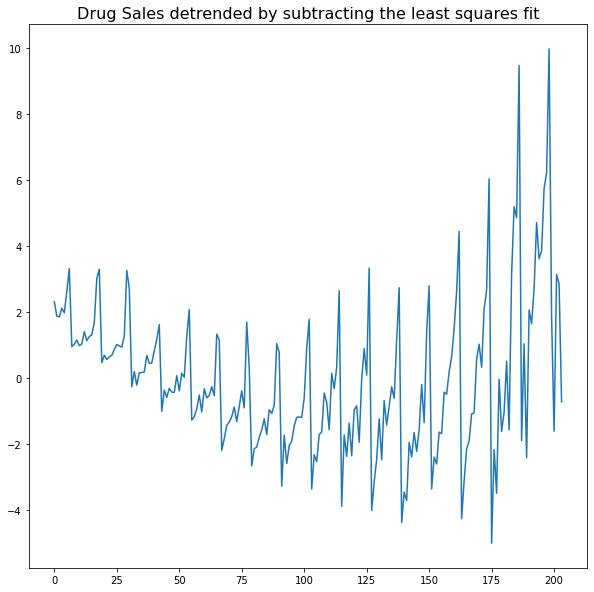

In [39]:
# Method 1: Subtract the line of best fit from the time series.
from scipy import signal
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

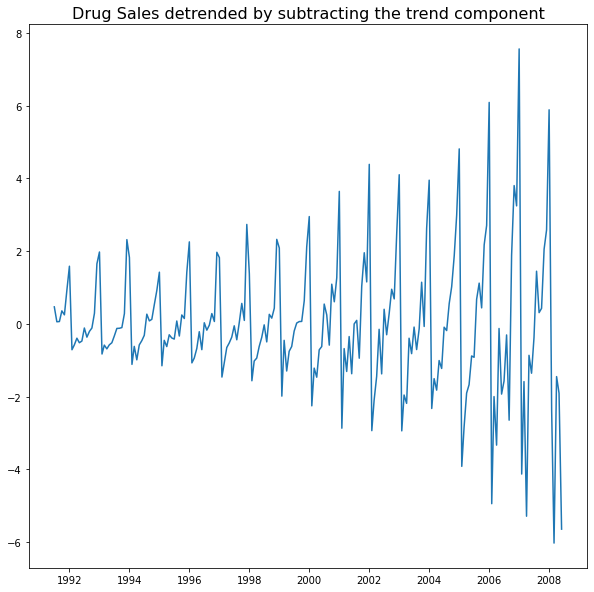

In [40]:
# Method 2: Subtracting the trend componet
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df1['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df1.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

# 14. How to deseasonalize a time series?
There are four main steps:

* Compute a series of moving averages using as many terms as are in the period of the oscillation. If the period is odd, then this is a simple average. But if the period is even, then you need a centered moving average.
* Divide the original data Yt by the results from step 1.
*  the average seasonal factors.
* Finally, divide Yt by the (adjusted) seasonal factors to obtain deseasonalized data.

<b>Moving Averages</b>
The first step is to create a column for moving averages. Note that the moving averages should be placed in the center of the period that you are working with.

<b>Seasonal Index</b>
Now we can compute the seasonal index, which is an average of the seasonal factors for each season (e.g. month, quarter, day, etc.).

<b>Deseasonalized</b>
Finally, divide the original data by the seasonal index to get deseasonalized data. This data represents the overall movement of the time series with seasonal effect smoothed out. Typically you would perform a regression on this data to predict the trendline and make forecasts.

[]

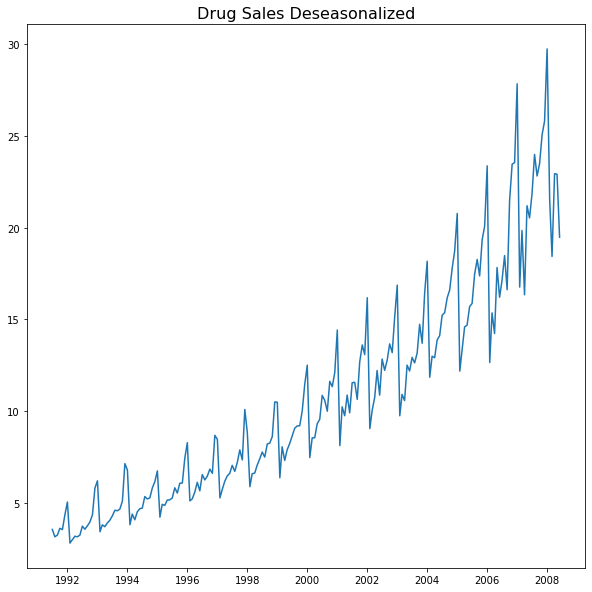

In [43]:
# Time Series Decomposition
result_mul = seasonal_decompose(df1['value'], model='multiplicative', extrapolate_trend='freq',period=5)

# Deseasonalize
deseasonalized = df1.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()


# 15. How to test for seasonality of a time series?
The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

* Hour of day
* Day of month
* Weekly
* Monthly
* Yearly

When there is a strong seasonal pattern, the ACF(autocorrelation function) plot usually reveals definitive repeated spikes at the multiples of the seasonal window. In real word datasets such strong patterns is hardly noticed and can get distorted by any noise, so we need a careful eye to capture these patterns.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

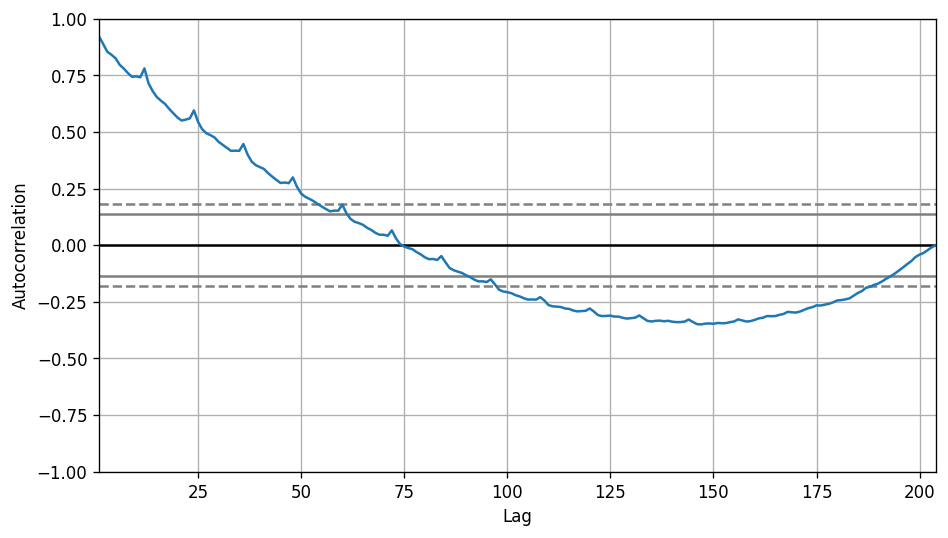

In [44]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df1.value.tolist())

# 16. How to treat missing values in a time series?
When it comes to time series,the missing values should not be replaced with the mean of the series, especially if the series is not stationary. What we could do instead for a quick and dirty workaround is to forward-fill the previous value.

Depending on the nature of the series, some effective alternatives to imputation are:

* Backward Fill
* Linear Interpolation
* Quadratic interpolation
* Mean of nearest neighbors
* Mean of seasonal couterparts

Lets see how time series with missing values look like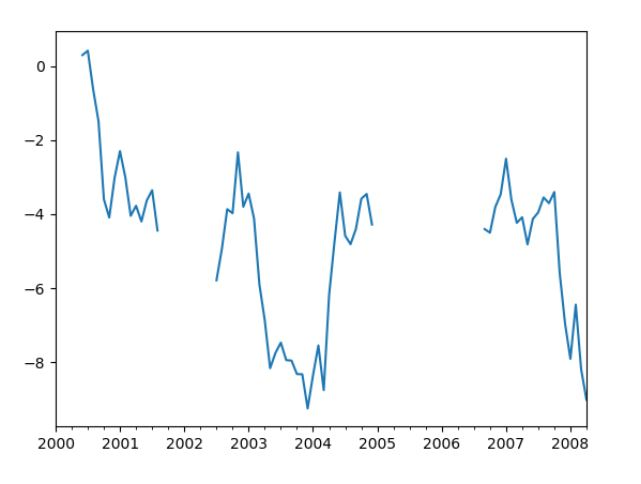

# 17. What is autocorrelation and partial autocorrelation functions?
<b>Autocorrelation(ACF)</b> refers to the degree of correlation of the same variables between two successive time intervals.It is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

<b>A partial autocorrelation(PACF)</b> is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. It conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

Note: <b>Lag</b> simply means delay. A “lag” is a fixed amount of passing time

In [55]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Calculate ACF and PACF upto 10 lags
acf_50 = acf(df1.value, nlags=10)
pacf_50 = pacf(df1.value, nlags=10)
print(acf_50)
print(pacf_50)

[1.         0.92056815 0.88782519 0.85385862 0.84052841 0.82523769
 0.79629658 0.77950157 0.75953251 0.74337588 0.74521347]
[ 1.          0.92510297  0.28297106  0.0759758   0.16921494  0.09370324
 -0.06396075  0.0560044   0.01650882  0.00431904  0.17496764]


Drawing ACF and PACF Plots

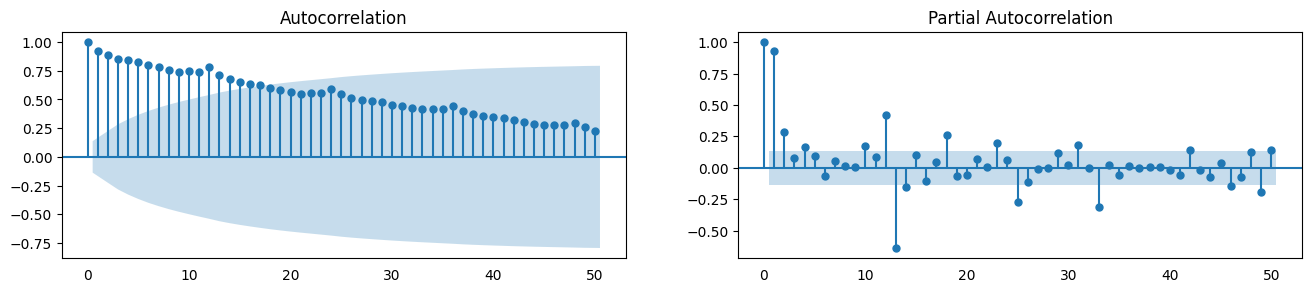

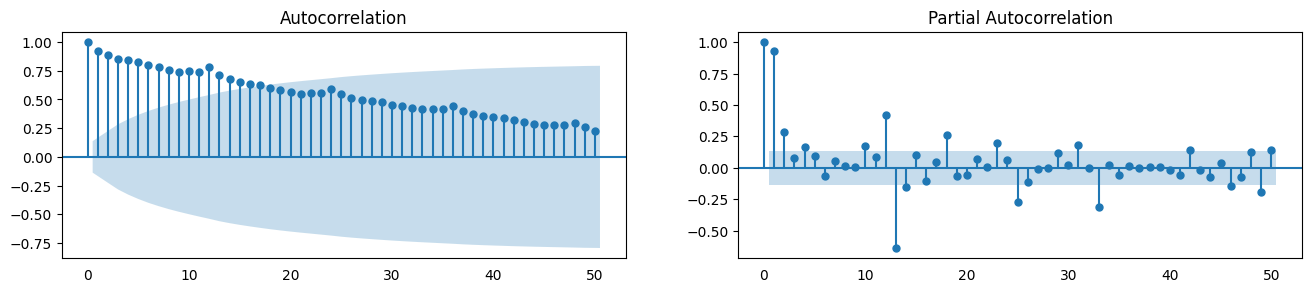

In [56]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df1.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df1.value.tolist(), lags=50, ax=axes[1])

# 18. Lag Plots
A <b>Lag plot</b> is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

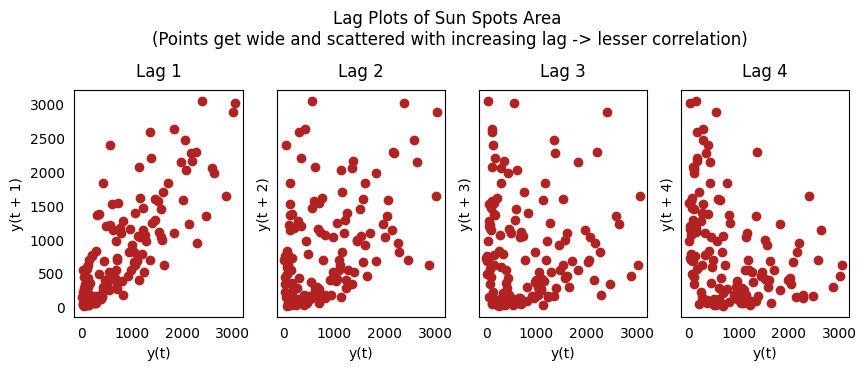

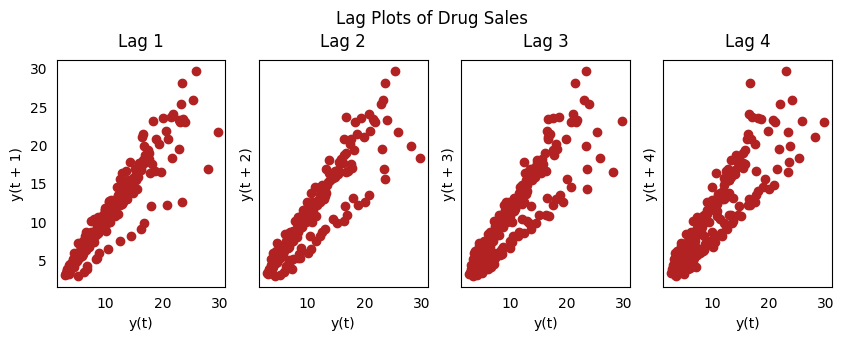

In [57]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

# 19. How to estimate the forecastability of a time series?

The more regular and repeatable patterns a time series has, the easier it is to forecast. The <b> <a id="https://en.wikipedia.org/wiki/Approximate_entropy">Approximate Entropy</a></b> can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the <b>‘Sample Entropy’</b>. It is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’

# 20. Why and How to smoothen a time series?
Smoothening of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better

#### Methods of smoothening
<ol>
<li>Take a moving average</li>
<li>Do a LOESS smoothing (Localized Regression)</li>
    <li>Do a LOWESS smoothing (Locally Weighted Regression)</li>
    </ol>
 A <b>moving average</b> is a statistic that captures the average change in a data series over time. In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

<b>LOESS, short for ‘LOcalized regrESSion’</b> fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

### Visualization of smoothening techniques

In [59]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates=['date'], index_col='date')

#### Moving Average

In [60]:

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

###  Loess Smoothing (5% and 15%)

In [61]:
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])


#### Plot

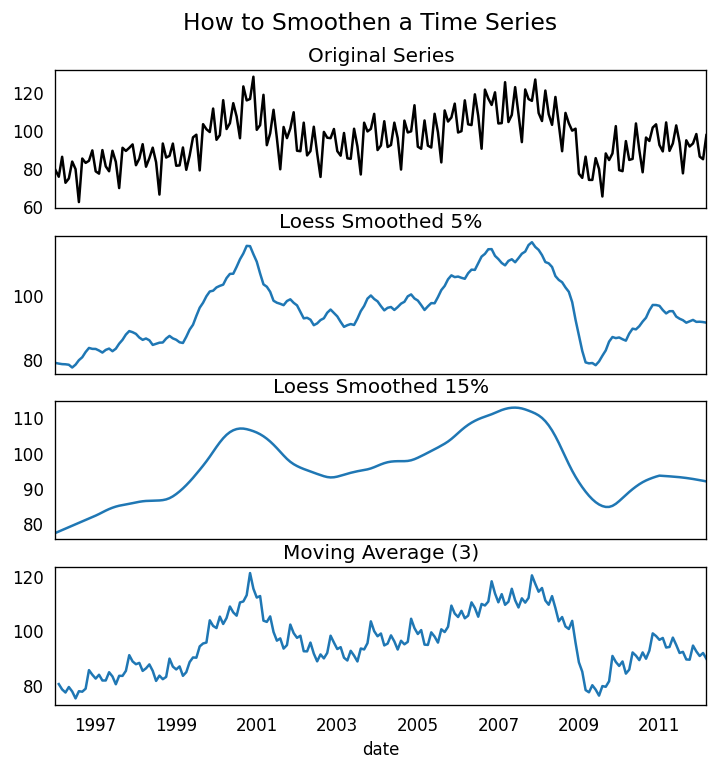

In [62]:
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()